In [1]:
%load_ext autoreload

In [2]:
from common import *

import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
config_common(save_loc="figs")

In [4]:
fontsize = 14

IP = "field_ip"
ADDR = "field_addr"

In [5]:
def plot(path: str, count: int):
    traces = []
    
    for i in range(count):
        traces.append(path + str(i))
    
    dfs = []

    for trace in traces:
        print("Reading " + trace)
        dfs.append(pd.read_csv(
            trace, 
            sep = " ", 
            names = [IP, ADDR], 
            converters = {
                IP: lambda x: int(x, 16),
                ADDR: lambda x: int(x, 16)
            }
        ))
        
    fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(7, 3))

    limited_dfs = []
    for trace in range(len(traces)):
        limited_dfs.append(dfs[trace][
            (dfs[trace][ADDR] > 10**14)
            & (dfs[trace][ADDR] <  1.407371 * 10**14)
        ])

    plot_dict = {}
    labels = []
    for trace in range(len(traces)):
        name = 'Worker ' + str(trace)
        labels.append(name)

        plot_dict[name] = limited_dfs[trace][ADDR]

    plot_df = pd.DataFrame(plot_dict)

    zorder = 10
    colors=['black', 'gray', 'dimgray','white']
    color_iter = 0
    for key in plot_dict:
        if key != 'Worker 0':
            plot_df[key].hist(ax=ax, bins=30, zorder=zorder, alpha=1, color=colors[color_iter], edgecolor='black')
            color_iter += 1
            zorder += 1

    ax.set_ylabel('Total Memory Accesses', fontsize=fontsize)
    ax.set_xlabel('Virtual Address', fontsize=fontsize)

    ax.legend(labels[1:], fontsize=fontsize)

Reading traces/pdot/1024_elems/memtrace.out.593229.0
Reading traces/pdot/1024_elems/memtrace.out.593229.1
Reading traces/pdot/1024_elems/memtrace.out.593229.2
Reading traces/pdot/1024_elems/memtrace.out.593229.3
Reading traces/pdot/1024_elems/memtrace.out.593229.4


Plot saved as `figs/pdot_mem_accesses.png`

Plot saved as `figs/pdot_mem_accesses.png`

Using pdfcrop on `figs/pdot_mem_accesses.png` with command `pdfcrop figs/pdot_mem_accesses.pdf figs/pdot_mem_accesses.pdf`

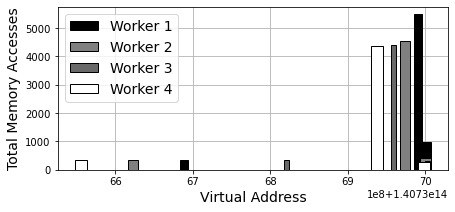

In [6]:
plot("traces/pdot/1024_elems/memtrace.out.593229.", 5)
savefig("pdot_mem_accesses")

Reading traces/psort/1024_elems/memtrace.out.603335.0
Reading traces/psort/1024_elems/memtrace.out.603335.1
Reading traces/psort/1024_elems/memtrace.out.603335.2
Reading traces/psort/1024_elems/memtrace.out.603335.3
Reading traces/psort/1024_elems/memtrace.out.603335.4


Plot saved as `figs/psort_mem_accesses.png`

Plot saved as `figs/psort_mem_accesses.png`

Using pdfcrop on `figs/psort_mem_accesses.png` with command `pdfcrop figs/psort_mem_accesses.pdf figs/psort_mem_accesses.pdf`

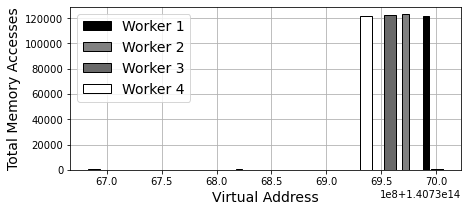

In [8]:
plot("traces/psort/1024_elems/memtrace.out.603335.", 5)
savefig("psort_mem_accesses")